In [1]:
from scipy.integrate import ode
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def f(t, y, rho, tQ):
    p = rho if t < tQ else 0
    
    dw = y[0] - 1
    if dw < 0 and y[0] <= 0:
        dw = 0
        
    dc = y[1] - 1 + p*y[0]
    if dc < 0 and y[1] <= 0:
        dc = 0
    return [dw, dc]

In [3]:
def get_sim(rho,eps,tQ=np.Inf,dt=0.1,t_end=100):
    y0, t0 = [eps+1, 0], 0
    result = [[t0,y0[0],y0[1]]]

    r = ode(f).set_integrator('zvode', method='bdf')
    r.set_initial_value(y0, t0).set_f_params(rho,tQ)
    while r.successful() and r.t < t_end:
        r.integrate(r.t+dt)
        result.append([r.t,r.y[0],r.y[1]])
    return pd.DataFrame(np.real(result), columns=['t','w','c'])

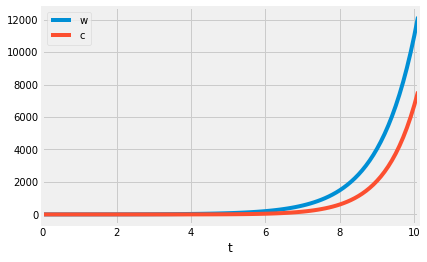

In [4]:
df = get_sim(0.1,0.5,t_end=10)
df.plot('t',['w','c'])

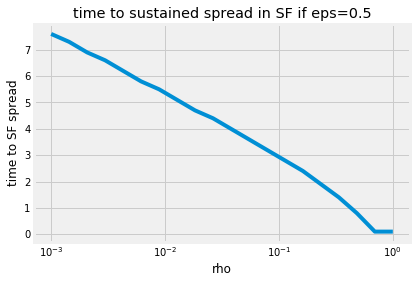

In [5]:
tplus = []
rhos = np.logspace(-3,0,20)
for rho in rhos:
    df = get_sim(rho,0.5)
    tp = df.loc[df['c']>0,'t'].iloc[0]
    tplus.append(tp)
plt.plot(rhos,tplus)
plt.xscale('log')
plt.xlabel('rho')
plt.ylabel('time to SF spread')
hey=plt.title('time to sustained spread in SF if eps=0.5')

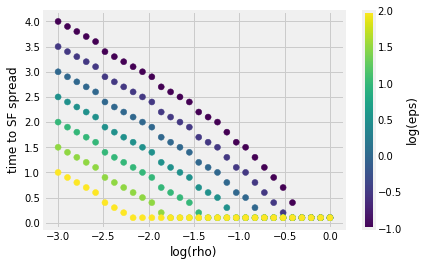

In [6]:
tplus_eps = []
eps = []
rhos = []
for ep in np.logspace(-1,2,7,base=np.e):
    for rho in np.logspace(-3,0,30,base=np.e):
        df = get_sim(rho,ep)
        tp = df.loc[df['c']>0,'t'].iloc[0]
        eps.append(ep)
        rhos.append(rho)
        tplus_eps.append(tp)
plt.scatter(np.log(rhos),tplus_eps,c=np.log(eps))
plt.xlabel('log(rho)')
plt.ylabel('time to SF spread')
clb = plt.colorbar()
clb.set_label('log(eps)')

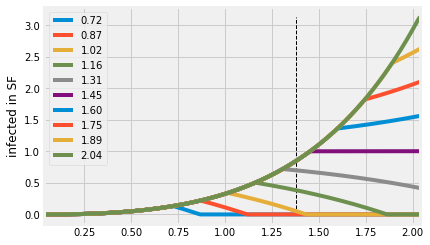

In [40]:
fig = plt.figure()
ax = plt.gca()
p = np.exp(-0.5)
e = np.exp(-0.5)
tplus_pred = np.log(1-p)-np.log(p)-np.log(e)
tX_pred = 1/(1-(1-e)*p)
for tQ in np.linspace(tplus_pred+tX_pred/2,tplus_pred+1.5*tX_pred,10):
    df = get_sim(p,e,dt=0.01,tQ=tQ,t_end=tplus_pred+1.5*tX_pred)
    df.plot('t','c',ax=ax,label=f'{tQ:.2f}')
plt.vlines(tplus_pred+tX_pred,ymin=0,ymax=df['c'].max(),linestyle='--',linewidth=1)
plt.ylabel('infected in SF')
plt.xlabel('')
hey=plt.xlim([tplus_pred/2,tplus_pred+1.5*tX_pred])

0.36787944117144233